In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from scipy.special import gamma
import math
import cv2

In [2]:
df = pd.read_csv("Assignment4Dataset.csv",header = None,names = ["x1","x2","y"])

In [3]:
df.head()

,x1,x2,y
0,1.140,-0.114,-1
1,-1.520,-1.150,1
2,-1.050,0.720,-1
3,-0.916,0.397,1
4,-1.090,0.437,1


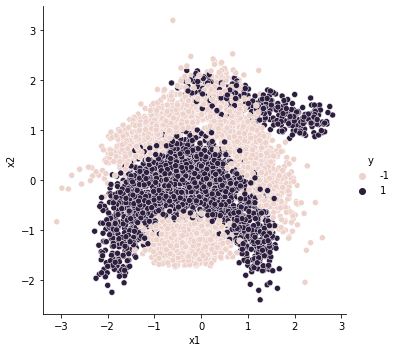

In [4]:
sns.relplot(data = df,x = "x1",y = "x2", hue = "y")

In [5]:
df.describe()

,x1,x2,y
count,5300.000000,5300.000000,5300.000000
mean,0.000016,0.000018,-0.103396
std,0.999880,1.000038,0.994734
min,-3.090000,-2.390000,-1.000000
25%,-0.753250,-0.914000,-1.000000
50%,-0.015250,-0.037200,-1.000000
75%,0.782000,0.822500,1.000000
max,2.810000,3.190000,1.000000


<font size = "4"><b> Adding extra features to data</b></font>

In [6]:
def fun(x):
    return x["x1"]*x["x2"]
def fun1(x):
    return (x["x1"]*x["x2"])**2
def fun2(x):
    return np.exp(x["x1"]*x["x2"])
def fun3(x):
    return (x["x1"]*x["x2"])**3

df['x3'] = df['x1'].apply(lambda x: x*x)
df['x4'] = df['x2'].apply(lambda x: x*x)
df['x5'] = df.apply(lambda x: fun(x),axis = 1)
df['x6'] = df.apply(lambda x: fun1(x),axis = 1)
df['x7'] = df.apply(lambda x: fun2(x),axis = 1)
df['x8'] = df.apply(lambda x: fun3(x),axis = 1)

<font size = "4"><b>Data is already standadized</b></font>

In [7]:
X = df[["x1","x2","x3","x4","x5","x6","x7"]].to_numpy()
Y = df["y"].to_numpy().reshape(1,-1)

In [8]:
x_train = X[:400]
y_train = Y[0][:400].reshape(1,-1)

x_test = X[400:]
y_test = Y[0][400:].reshape(1,-1)

In [9]:
x_test.shape

(4900, 7)

In [10]:
y_train.shape

(1, 400)

In [11]:
n = x_train.shape[0]
d = x_train.shape[1]
print(x_train.shape)

(400, 7)


<font size = "4"><b>Optimization function</b></font>

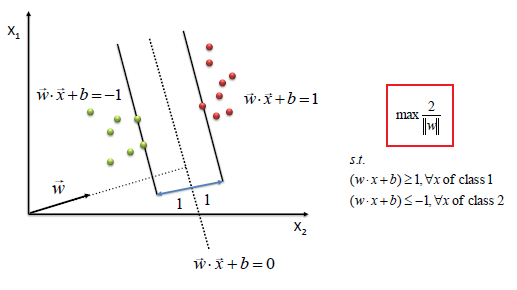

In [12]:
lamda = np.zeros(shape = (1,n))
cache = np.zeros(shape = (1,n))
def solve_quadratic(a,b,d):
    # Solve aX^2+bX such that X>=-d
    opt_arg = -b/(2*a)
    #print(a,b,d)
    if opt_arg < -d:
        opt_arg = -d
    return opt_arg

def K(X,xp):
    #diff = X-xp
    return (X @ np.transpose(xp))

def k(a,b):
    return (a @ np.transpose(b))

def stopping_condition(cache,Y,lamda):
    n = Y.shape[1]
    temp = cache*Y
    c1 = np.sum((temp[lamda >1e-6]-1)<1e-6)
    c2 = np.sum((temp[lamda <= 1e-6]-1)>=1e-6)
    print("Number of Lagrange multipliers satisfies first order KKT conditions : ",c1+c2,"(out of ",n,")")
    return (c1+c2 == n)

def test_accuracy(x,y,w):
    (n,d) = x.shape
    pred = n - (np.logical_xor((x @ w) > 0, y>0).sum())
    return (pred/n) * 100
    
epochs = 0

max_acc = 0
max_epoch = 1;
while(stopping_condition(cache,y_train,lamda)==False):
    # Shuffle the data
    temp = np.hstack((x_train,y_train.reshape(-1,1)))
    np.random.shuffle(temp)
    y_train = temp[:,d].reshape(1,-1)
    x_train = temp[:,0:d]
    
    # Go through each example
    for p in range(n):
        opt_arg = solve_quadratic(0.5*k(x_train[p],x_train[p]),y_train[0][p]*cache[0][p]-1,lamda[0][p])
        lamda[0][p] = lamda[0][p]+opt_arg
        cache = cache + opt_arg*y_train[0][p]*K(x_train,x_train[p])
        
    w_temp = np.sum(x_train * (lamda*y_train).reshape(-1,1),axis = 0)
    acc = test_accuracy(x_train,y_train,w_temp)
    
    if acc>max_acc:
        max_acc = acc
        w = w_temp
        max_epoch = epochs
    print("epoch = ",epochs," Accuracy :",acc)
    if epochs == 100:
        break
    epochs = epochs+1
print("Max_Accuracy = ", max_acc)        

Number of Lagrange multipliers satisfies first order KKT conditions :  0 (out of  400 )
epoch =  0  Accuracy : 78.0
Number of Lagrange multipliers satisfies first order KKT conditions :  264 (out of  400 )
epoch =  1  Accuracy : 49.75
Number of Lagrange multipliers satisfies first order KKT conditions :  253 (out of  400 )
epoch =  2  Accuracy : 57.99999999999999
Number of Lagrange multipliers satisfies first order KKT conditions :  247 (out of  400 )
epoch =  3  Accuracy : 43.75
Number of Lagrange multipliers satisfies first order KKT conditions :  243 (out of  400 )
epoch =  4  Accuracy : 43.5
Number of Lagrange multipliers satisfies first order KKT conditions :  239 (out of  400 )
epoch =  5  Accuracy : 46.25
Number of Lagrange multipliers satisfies first order KKT conditions :  254 (out of  400 )
epoch =  6  Accuracy : 71.0
Number of Lagrange multipliers satisfies first order KKT conditions :  281 (out of  400 )
epoch =  7  Accuracy : 56.25
Number of Lagrange multipliers satisfies 

epoch =  87  Accuracy : 61.0
Number of Lagrange multipliers satisfies first order KKT conditions :  226 (out of  400 )
epoch =  88  Accuracy : 49.25
Number of Lagrange multipliers satisfies first order KKT conditions :  275 (out of  400 )
epoch =  89  Accuracy : 51.24999999999999
Number of Lagrange multipliers satisfies first order KKT conditions :  227 (out of  400 )
epoch =  90  Accuracy : 66.0
Number of Lagrange multipliers satisfies first order KKT conditions :  283 (out of  400 )
epoch =  91  Accuracy : 55.00000000000001
Number of Lagrange multipliers satisfies first order KKT conditions :  247 (out of  400 )
epoch =  92  Accuracy : 50.5
Number of Lagrange multipliers satisfies first order KKT conditions :  247 (out of  400 )
epoch =  93  Accuracy : 62.74999999999999
Number of Lagrange multipliers satisfies first order KKT conditions :  262 (out of  400 )
epoch =  94  Accuracy : 44.25
Number of Lagrange multipliers satisfies first order KKT conditions :  264 (out of  400 )
epoch =

In [13]:
max_epoch

0

In [14]:
np.sum(lamda ==0)

155

In [15]:
test_accuracy(x_test,y_test,w)

78.14285714285715

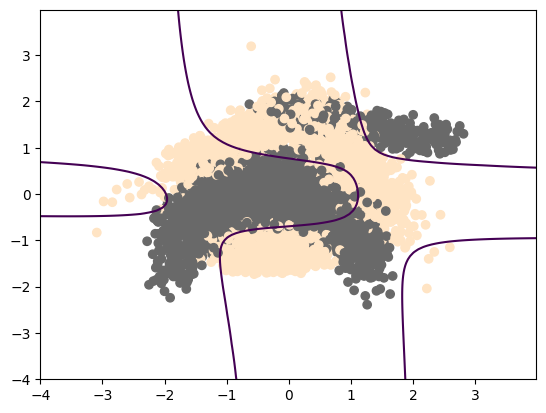

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def f(x,y,w):
    return w[2]*x**2+w[4]*x*y+w[3]*y**2+w[0]*x+w[1]*y+w[5]*(x*y)**2+w[6]*np.exp(x*y)

xx = np.arange(-4.0,4.0,0.07)
yy = np.arange(-4.0,4.0,0.07)
XX, YY = np.meshgrid(xx,yy)
plt.contour(xx, yy, f(XX, YY,w),[0])
colors = {1 : "dimgrey",-1 : "bisque"}
plt.scatter(x_test[:,0],x_test[:,1],c=df["y"][400:].apply(lambda x: colors[x]))
#sns.relplot(data = df,x = "x1",y = "x2", hue = "y")
plt.show()

In [17]:
grid = []
for i in np.arange(-3, 3.01, 0.1):
    for j in np.arange(-3, 3.01, 0.1):
        grid.append([i,j])

grid_df = pd.DataFrame(grid, columns=['x1', 'x2'])

grid_df['x3'] = grid_df['x1']**2
grid_df['x4'] = grid_df['x2']**2
grid_df['x5'] = grid_df['x1']*grid_df['x2']
grid_df['x6'] = (grid_df['x1']*grid_df['x2'])**2
grid_df['x7'] = np.exp(grid_df["x1"]*grid_df["x2"])

In [18]:

x_grid = grid_df.to_numpy()
y_grid = np.dot(x_grid, w)
y_grid = np.array([1 if y_grid[i] > 0 else -1 for i in range(len(y_grid))])
plt.scatter(x_grid[:,0][y_grid==-1], x_grid[:,1][y_grid==-1], s=3, c='r')
plt.scatter(x_grid[:,0][y_grid==1], x_grid[:,1][y_grid==1], s=3, c='b')
plt.savefig('Grid_Predictions/SVM.jpg')
plt.close()

Text(0.5, 1.0, 'SVM Grid')

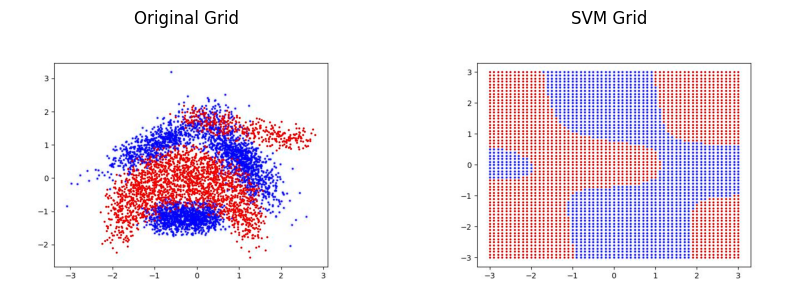

In [19]:
Image1 = cv2.imread('Grid_Predictions/original_grid.jpg')
Image2 = cv2.imread('Grid_Predictions/SVM.jpg')

# create figure
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 1
columns = 2

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(Image1)
plt.axis('off')
plt.title("Original Grid")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(Image2)
plt.axis('off')
plt.title("SVM Grid")